<a href="https://colab.research.google.com/github/v0001/Camper_/blob/master/UNIST-assignment/2020_2)%20%ED%86%B5%EA%B3%84%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/Assignment3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Programming
### Fall 2020
### Homework 3 (Due Oct 15)

1. Reproduce the Figure 4.1 with your convenient statistical software. Provide your code and its output. 

In [1]:
import numpy as np                # numpy로 다양한 수식을 사용
import pandas as pd               # pandas lib 사용
import matplotlib.pyplot as plt   # 그래프 
import pandas.util.testing as tm
import seaborn as sns
import scipy.stats as ss
from scipy.stats import norm
import matplotlib.mlab as mlab
import math
%matplotlib inline
%precision 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


'%.3f'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gfr = pd.read_csv("/content/drive/My Drive/★UNIST/2020 2학기/Statistical Programming/Assignment 3/gfr.txt", delimiter=" ", header=None)
gfr.columns = ['value']

In [4]:
gfr.head()

,value
0,108
1,91
2,62
3,59
4,84


In [5]:
mu = np.mean(gfr).value
sigma = np.std(gfr).value
mu, sigma

(54.265, 13.688)

In [6]:
data = np.arange(-10, 120, 1)
y_normal = 1/np.sqrt(2*np.pi*sigma**2)/np.exp((data-mu)**2/(2*sigma**2))

In [7]:
from scipy.special import gamma

mu = 21.4
shape = 6.0
scale = 5.47
y_gamma = (data-mu/2) ** (shape - 1) * np.exp(- (data-mu/2)/ scale) / (scale ** shape * gamma(shape))
y_gamma

array([-5.203e+01, -3.383e+01, -2.172e+01, -1.374e+01, -8.558e+00,
       -5.235e+00, -3.138e+00, -1.837e+00, -1.048e+00, -5.791e-01,
       -3.086e-01, -1.574e-01, -7.607e-02, -3.441e-02, -1.430e-02,
       -5.307e-03, -1.685e-03, -4.243e-04, -7.313e-05, -6.027e-06,
       -5.942e-08,  7.156e-10,  9.107e-07,  1.315e-05,  6.660e-05,
        2.084e-04,  4.937e-04,  9.759e-04,  1.698e-03,  2.687e-03,
        3.953e-03,  5.487e-03,  7.263e-03,  9.244e-03,  1.138e-02,
        1.362e-02,  1.591e-02,  1.818e-02,  2.040e-02,  2.250e-02,
        2.445e-02,  2.622e-02,  2.778e-02,  2.910e-02,  3.018e-02,
        3.102e-02,  3.161e-02,  3.196e-02,  3.208e-02,  3.198e-02,
        3.169e-02,  3.122e-02,  3.059e-02,  2.981e-02,  2.892e-02,
        2.793e-02,  2.686e-02,  2.573e-02,  2.455e-02,  2.334e-02,
        2.211e-02,  2.088e-02,  1.966e-02,  1.846e-02,  1.728e-02,
        1.613e-02,  1.502e-02,  1.396e-02,  1.294e-02,  1.196e-02,
        1.104e-02,  1.017e-02,  9.343e-03,  8.571e-03,  7.848e

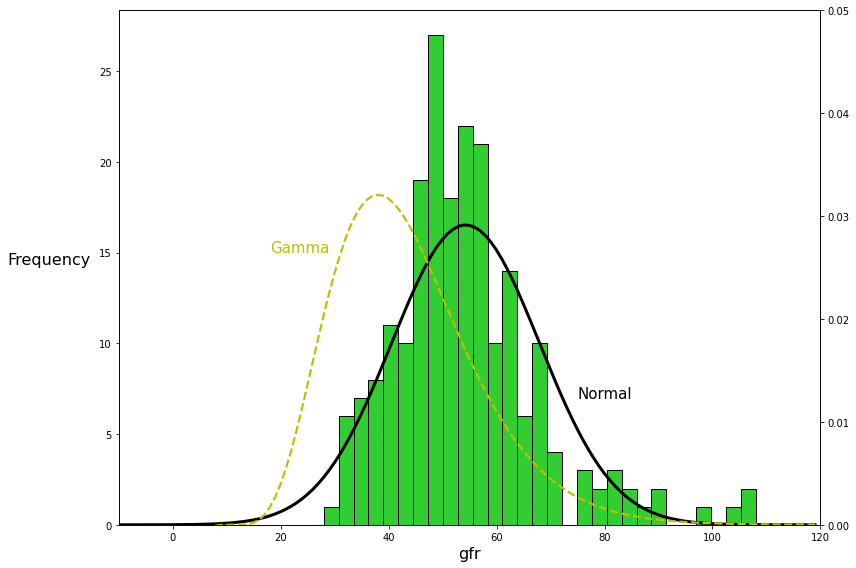

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.hist(gfr.value,bins = 29, edgecolor="k", color="limegreen")
ax1.set_xlabel(r"gfr", size=16)
ax1.set_ylabel(r"Frequency", size=16 , rotation = 0, labelpad=50);
ax1.annotate("Normal",xy=(75, 7.0) ,size=15)
ax1.annotate("Gamma",xy=(18, 15.0),size=15,color="y")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set(xlim=(-10, 120),ylim=(0,0.05))
color = 'tab:blue'
# ax1.plot(x,result )

ax2.plot(data,y_normal,linewidth = 3, color = 'k')
ax2.plot(data,y_gamma, color = 'y', linestyle = '--', linewidth = 2.2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# Problem 2


2. Suppose we wish to estimate a single parameter $\mu$ from observation $x$ in the Bayesian situation
$$
\mu\sim \mathcal{N}(M,A)\quad\text{and}\quad x|\mu\sim\mathcal{N}(\mu,1).
$$
    + Calculate the Bayes estimator of $\mu$, $\hat{\mu}^{\text{Bayes}}$.
    + Calculate the MLE of $\mu$, $\hat{\mu}^{\text{MLE}}$.
    + If $A=1$, then what would the value of $E\{(\hat{\mu}^{\text{Bayes}}-\mu)^2\}$ be?
    

## 2-1. Calculate the Bayes estimator of $\mu$, $\hat{\mu}^{\text{Bayes}}$



1. Assumption 


$$
\textbf{P}\left (  \mu \right ) \sim N\left(M, A \right) 
$$

$$
\textbf{P}\left (  x|\mu \right ) \sim N\left(\mu, 1 \right) = N\left(\mu_{0}  , \sigma_{0}^2 \right)
$$

$$

2. Find $\hat{\mu}^{\text{Bayes}}$ through Bayesian Theorem

$$
\textbf{P}(\mu\mid D)= \frac{\textbf{P}(D\mid  \mu)\textbf{P}(\mu)}{\textbf{P}(D)}
$$
$$
=  \prod_{i = 1}^{N} \textbf{P}(x_{i}\mid \theta )\textbf{P}(\mu)\frac{1}{\sum_{1}^{N}\textbf{P}(x_{i})}
$$
Because of $\sum_{1}^{N}\textbf{P}(x_{i}) = 1,$ 
$$
\ \textbf{P}(\mu\mid D)=\textbf{P}(\mu)\prod_{i = 1}^{N} \textbf{P}(x_{i}\mid \theta )
$$

$$
= \frac{1}{\sqrt{2\pi \sigma_{0}^2}} \exp (\frac{-( M -\mu_{0})^2}{2\sigma_{0}^2})* \prod_{i = 1}^{N}\frac{1}{\sqrt{2\pi A }} \exp (\frac{-(x_i-\mu)^2}{2 A })
$$

$$
= \frac{1}{\sqrt{2\pi \sigma_{0}^2}}\frac{1}{\sqrt{2\pi  A }} \exp (\frac{-( M -\mu_{0})^2}{2\sigma_{0}^2} -\sum_{i=1}^{N}\frac{(x_i- M )^2}{2 A })
$$
$$
= \frac{1}{\sqrt{2\pi^{(N+1)}}{\sqrt{\sigma_{0}^2 \sigma^{2N}}}} \exp (\frac{-( M -\mu_{0})^2}{2\sigma_{0}^2} -\sum_{i=1}^{N}\frac{(x_i- M )^2}{2 A })
$$

$$
= \frac{1}{\sqrt{2\pi^{(N+1)}}{\sqrt{\sigma_{0}^2 \sigma^{2N}}}} \exp [\frac{1}{2\sigma_{0}^2} (- M^2+2 M \mu_{0}-\mu_{0}^2)-\frac{1}{2 A }\sum_{i=1}^{N}(x_i^2-2x_i M + M^2)]
$$
$$
\propto  \exp [\frac{1}{2\sigma_{0}^2} (- M^2+2 M\mu_{0}-\mu_{0}^2)-\frac{1}{2 A }\sum_{i=1}^{N}(x_i^2+2x_i M + M^2)]
$$
$$
=  \exp [\frac{- M^2( A  + \sigma_0^2N)+ 2 M (\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i) -(\mu_0^2 A  + \sum_{i = 1}^{N} \sigma_0^2x_i^2)}{2\sigma_{0}^2 A }]
$$
$$
=  \exp [-\frac{ M^2 - \frac{2 M(\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i)}{ A  + \sigma_0^2N} +\frac{(\mu_0^2 A  + \sum_{i = 1}^{N} \sigma_0^2x_i^2)}{ A  + \sigma_0^2N}}{\frac{2\sigma_{0}^2 A }{ A + \sigma_0^2N}}]
$$
$$
\propto  \exp [-\frac{ M ^2 - \frac{2 M (\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i)}{ A  + \sigma_0^2N} +(\frac{\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i}{ A  + \sigma_0^2N})^2}{\frac{2\sigma_{0}^2 A }{ A + \sigma_0^2N}}]
$$
$$
= \exp [-\frac{( M  - \frac{\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i}{ A  + \sigma_0^2N})^2}{2\frac{\sigma_{0}^2 A }{ A  + \sigma_0^2N}}]
$$

AS the prior is assumed as Gaussian, we can assume that the posterior is Gaussian as well. 

$$
\textbf{P}(\mu\mid D) = \frac{1}{\sqrt{2\pi\sigma_{1}^2}}\exp {\left \{ -\frac{1}{2\sigma_{1}^2}( M -\mu_{1})^2 \right \}}
$$

$$
\propto \exp [-\frac{( M  - \frac{\mu_0 A  + \sum_{i=1}^{N}\sigma_0^2x_i}{ A  + \sigma_0^2N})^2}{2\frac{\sigma_{0}^2 A }{ A  + \sigma_0^2N}}]
$$
Through the above result, we can infer the target parameters ( $\hat{\mu}^{\text{Bayes}}$)

$$
\hat{\mu}^{\text{Bayes}} = \frac{\mu_0 A + \sum_{i=1}^{N}\sigma_0^2x_i}{ A  + \sigma_0^2N}
$$

$$
= \mu_0 \frac{ A }{ A  + \sigma_0^2N} + \frac{ \sigma_0^2 \sum_{i=1}^{N}x_i}{ A + \sigma_0^2N}
$$
$$
= \mu_0 \frac{ A }{A + \sigma_0^2N} + \bar{X}\frac{ \sigma_0^2 N}{A+ \sigma_0^2N}
$$

$$
= \mu_0 \frac{ A }{A + \sigma_0^2N} + \bar{X}\frac{ \sigma_0^2 N}{A+ \sigma_0^2N}
$$



Now, apply below notation. 
$$
\textbf{P}\left (  x|\mu \right ) \sim N\left(\mu, 1 \right) = N\left(\mu_{0}  , \sigma_{0}^2 \right)
$$

$$
= \mu \frac{ A }{A +N} + M \frac{ N}{A+ N}
$$

## 2-2. Calculate the MLE of $\mu$, $\hat{\mu}^{\text{MLE}}$.

$$
 {\cal L}(\theta) = \sum_{t=1}^{N} log \ \textbf{P}\left ( x_i\mid \theta  \right )  
 $$

$$
\qquad         = \sum_{t=1}^{N} log (\frac{1}{\sqrt{2\pi \sigma ^2}}exp(-\frac{(x_t-\mu)^2}{2\sigma ^2}))
 $$

 $$
 \qquad = \sum_{t=1}^{N} \left[ -\frac{1}{2} log 2\pi \sigma ^2 - \frac{1}{2\sigma ^2}(x_t-\mu)^2   \right ]
 $$

> In order to find the best parameters making the maximum likelihood,
need to differentiate the above formula from each parameter's perspective.

> 1. find the best $\hat{\mu}^{\text{MLE}}$ (differentiate $\textbf{P}\left ( x\mid \theta  \right )$ from $\mu$  perspective) 

$$
 {\cal L}(\theta) = \sum_{t=1}^{N} \left[ -\frac{1}{2} log 2\pi \sigma ^2 - \frac{1}{2\sigma ^2}(x_t-\mu)^2   \right ]
$$
$$
Remove \ the \ constant
$$

$$
= -  \sum_{t=1}^{N} \frac{1}{2\sigma ^2}(x_t-\mu)^2
$$

$$
\qquad    
= -  \sum_{t=1}^{N} \frac{1}{2\sigma ^2}(x_t^2 - 2x_t\mu+\mu^2)
$$

$$
Remove \ the \ constant
$$
$$
\qquad       = -  \sum_{t=1}^{N} \frac{1}{2\sigma ^2}(- 2x_t\mu+\mu^2)
$$
$$
\Downarrow \frac{d {\cal L}(\theta)}{d\mu } = 0
$$
$$
l(\mu ) = -  \sum_{t=1}^{N} \frac{1}{2\sigma ^2}(- 2x_t+2\mu)
= 0
$$
$$
\qquad = \sum_{t=1}^{N} \frac{(x_t - \mu)}{\sigma ^2} 
$$

$$
\qquad =  \sum_{t=1}^{N} \frac{x_t}{\sigma ^2} - \sum_{t=1}^{N} \frac{ \mu}{\sigma ^2}  = 0
$$

$$
\sum_{t=1}^{N}\mu = \sum_{t=1}^{N} x_t 
$$
$$
N\mu =\sum_{t=1}^{N} x_t 
$$
$$
\hat{\mu}^{\text{MLE}} =\frac{1}{N}\sum_{t=1}^{N} x_t 
$$

## 2-3. If $A=1$, then what would the value of $E\{(\hat{\mu}^{\text{Bayes}}-\mu)^2\}$ be?


$$
\hat{\mu} = E[\mu|X] = \int \mu P(\mu|x)d\mu
$$

$$
E[\hat{\mu}-\mu] = E[E[\mu|x] - \mu] = E[E[\mu|x]]-E[\mu] = E[\hat{\mu} ]-E[\mu] = 0
$$
Therefore, we can get this assumption. 
$$
E[\hat{\mu} ]=E[\mu]
$$


> 1. Find $E\{(\hat{\mu}^{\text{Bayes}}-\mu)^2\}$


$$
E\{(\hat{\mu}^{\text{Bayes}}-\mu)^2\} = Var \hat{\mu} + (E[\hat{\mu}]-\mu)^2 
$$
$$
= 1 + (E[\mu]-\mu)^2 
$$


> Result 
$$
E\{(\hat{\mu}^{\text{Bayes}}-\mu)^2\}= 1 + (M-\mu)^2 
$$

# Problem 3

3. An engineer measures the voltages on a batch of 12 tubes, using a voltmeter that is normally calibrated,
$$
x\sim \mathcal{N}(\mu,1),
$$
where $x$ being any one measurement and $\mu$ the true batch voltage. The measurements range from 82 to 99, with an average of $\bar{x}=92$, which he reports back as an unbiased estimate of $\mu$. The next day he discovers a glitch in his voltmeter such that any voltage exceeding 100 would have been reported as $x=100$. 
    + Is $\bar{x}=92$ still unbiased for the true expectation $\mu$? Describe the difference between Frequentist perspective and Bayesian perspective on this question. 
    + Suppose that you computed confidence interval and credible interval of $\mu$ before discovering the glitch. Explain how the glitch affects your confidence interval and credible interval. 


## 3-1. Is $\bar{x}=92$ still unbiased for the true expectation $\mu$? Describe the difference between Frequentist perspective and Bayesian perspective on this question. 

1) Frequentist Perspective 
- $\bar{x}=92$ is not still unbiased for the true expectation 

As he found the new measurement unlike the previous result of his measurement, it means that the assumption is not sufficient to explain the family of the entire valtages.  

 $\bar{x}=92$ is biased for the true exoectation $\mu$ since the assumed distribution [$ x\sim \mathcal{N}(\mu,1)$ ] is no longer completely describes the probability of the observed data. 



2) Bayesian Perspective 
- $\bar{x}=92$ is still unbiased for the true expectation 

for any density $g(\mu)$, the posterior density 
$$
g(\mu|x) = g(\mu)f_\mu(x)/f(x)
$$
where $x$ is the vector of 12 measurements, depending only on the data $x$ actually observed. 

It means that $g(\mu|x)$ depens on the measured data only. but it doesn't depend on other potential data sets X  or the family of the entire valtages that might have seen. 


## 3-2. Suppose that you computed confidence interval and credible interval of $\mu$ before discovering the glitch. Explain how the glitch affects your confidence interval and credible interval. 

1. confidence interval from 

$\mu$ is a confidence interval which means the probability that the population mean is placeed whitin the set of sample means. If we take 100 random samples, the true population mean can lie in the 95 confidence intervals of the sample sets out of 100. 

In this situation, because new data(over 100) is observed, (any voltage exceeding 100 would have been reported as  x=100) the sample space is changed. 

In other words, we can say that the true population mean would be different from what we assumed. and changed to the higher value. Therefore, it's diffidult to believe in the confidence interval.   





2. credible interval 

$\mu$ is a credible interval that is simply an interval within which an unobserved parameter value falls with a particular probability.

The credible interval is irrespective of the likelihood function for the full data set. Thus, the posterior distribution $g(\mu|x)$ doesn't have an effect on the credible interval because it is only affected by x through the likelihood $L(\mu|x)$. 

To wrap up, it doesn't depend on the unobserved potential data sets X, the glitch doesn't affect the credible interval. 


# Problem 4

4. The family of Bernoulli distributions $B(p)$ has probability mass function 
$$
f(x|p)=p^x(1-p)^{1-x}
$$
and taking the logarithm
$$
\log f(x|p)=x\log p+(1-x)\log(1-p).
$$
    + Show that the MLE of $p$ is $\bar{X}$. That is, $\hat{p}=\bar{X}$.
    + Calculate the fisher information of $p$, $I(p)$.
    + What is the asymtotic distribution of $\hat{p}$?

## 4-1. Show that the MLE of $p$ is $\bar{X}$. That is, $\hat{p}=\bar{X}$.

Through the second derivatibe of the log likelihood function, 
$$
\ddot{l}_x(\theta ) = \frac{\partial^2 }{\partial \theta^2} log f_\theta(x) = \frac{\ddot{f}_\theta(x)}{f_\theta(x)} - \left ( \frac{\dot{f}_\theta(x)}{f_\theta(x)}\right )^2 
$$





> Assumption 

$$
f(x|p)=p^x(1-p)^{1-x}
$$
and taking the logarithm
$$
\log f(x|p)=x\log p+(1-x)\log(1-p).
$$



> Derivation 

$$
\dot l_x(p) =\frac{\partial }{\partial p} log f(x|p)= \frac{x}{p} + \frac{x-1}{1-p} = \frac{x-xp+xp-p}{p(1-p)} = \frac{x-p}{p(1-p)}
$$
$$
\ddot l_x(p) =\frac{\partial^2 }{\partial p^2} log f(x|p) = -\frac{x}{p^2} + \frac{x-1}{(1-p)^2}
$$

In case of $\hat{p}$, we can assume that $\dot l_x(\hat{p}|x) = 0 $. 

$$
\dot l_x(\hat{p}) = \frac{x-\hat{p}}{\hat{p}(1-\hat{p})} = 0 
$$

$$
\frac{x}{\hat{p}(1-\hat{p})} = \frac{x}{\hat{p}(1-\hat{p})}
$$
$$
x = \hat{p}
$$

## 4-2. Calculate the fisher information of $p$, $I(p)$.




> Fisher Information 

$$
I(p) = E_p\left \{ [\dot l(x|p)]^2 \right \} = \int [\dot l(x|p)]^2 f(x|p) dx
 = - E_p [\ddot l(x|p)] 
$$
$$
= - \int  \frac{\partial^2 }{\partial p^2} log f(x|p) f(x|p) dx
$$

> Derivation 

$$
\dot l_x(p) =\frac{x}{p} + \frac{x-1}{1-p}= \frac{x-p}{p(1-p)}
$$
$$
\ddot l_x(p)= -\frac{x}{p^2} + \frac{x-1}{(1-p)^2}
$$
$$
I(p) = - E[\ddot l(x|p)]  = - E[-\frac{x}{p^2} + \frac{x-1}{(1-p)^2}]
$$
$$
= \frac{E[x]}{p^2} - \frac{E[x]-1}{(1-p)^2}
$$
Since E(x) = p

$$
= \frac{p}{p^2} - \frac{p-1}{(1-p)^2} = \frac{1}{p} + \frac{1}{1-p}
$$

> Result

$$
I(p) = \frac{1}{p(1-p)}  
$$




## 4-3. What is the asymtotic distribution of $\hat{p}$?

> Derivation 

$$
\dot l_x(p) =\frac{x}{p} + \frac{x-1}{1-p}= \frac{x-p}{p(1-p)}
$$
$$
\ddot l_x(p)= -\frac{x}{p^2} + \frac{x-1}{(1-p)^2}
$$
$$
I_x(p) =E[\dot l (x|p)] = \frac{E(X)}{p^2} + \frac{1-E(X)}{(1-p)^2} = \frac{1}{p}+\frac{1}{1-p} = \frac{1}{p(1-p)}  
$$


> Result

$$
I_x(p)  = \frac{1}{p(1-p)}  
$$

# Problem 5

5. Let $X_1,\ldots,X_n$ be iid Poisson($\lambda$), and let $\bar{X}$ be the sample mean. 
     + Show that $\bar{X}$ is an unbiaed estimator of $\lambda$. 
     + For any other unbiased estimator of $\lambda$, $W$, show that 
    $$
    Var_{\lambda}\bar{X}\leq Var_{\lambda}W
    $$



> Assumption 
1. 
$$
 \frac{d}{d \theta}E_\theta W(x) = \int_x \frac{\partial}{\partial \theta}[W(x) f(x|\theta)] dx
$$
2. 
$$
Var_\theta W(x) < \infty
$$
3. 
$$
Var_\theta W(x) \geq \frac{(\frac{\partial}{\partial \theta}[E(W(x|\theta))])^2}{(\frac{\partial}{\partial \theta}log f(x|\theta))^2} 
$$
4. Cramer-rao lower bound

$$
Var_\theta\{\hat{\theta}\} \geq \frac{1}{nI_\theta}
$$

5. If $f(x|\theta)$ is an exponential family, 
$$
E_\theta ((\frac{\partial}{\partial \theta}log f(x|\theta))^2) = -E_\theta (\frac{\partial^2}{\partial \theta^2}log f(x|\theta)) 
$$
6. $\bar{X}$ is an unbiased estimator of $\lambda$.
$$
E_\lambda \bar{X} = \lambda
$$



> Approach 

Information number(Fisher information) = $E_\theta ((\frac{\partial}{\partial \theta}log f(x|\theta))^2)$

- the information number gives a bound on the varienve of the best unbiased estimator of $\theta$
- e.g) As the infromation number gets bigger and it has more information about $\theta$, we have a similar bound on the variance of the best unbiased estimator.


> Derivation

As Poisson( λ ) is an exponential family, we can derive below. 

$$
E_\lambda((\frac{\partial}{\partial \lambda }log \prod_{i=0}^{n}f(X_i|\lambda))^2) = -nE_\lambda(\frac{\partial^2}{\partial \lambda ^2}log f(X|\lambda))
$$
$$
= -nE_\lambda(\frac{\partial^2}{\partial \lambda ^2}log (\frac{e^{-\lambda}\lambda^X}{X!}))
$$

$$
= -nE_\lambda(\frac{\partial^2}{\partial \lambda ^2}(-\lambda + Xlog \lambda -log X!))
$$

- Remove constants after differentiation 

$$
= -nE_\lambda(-\frac{X}{\lambda^2})
$$

$$
= -nE_\lambda(-\frac{X}{\lambda^2})
$$
$$
= \frac{n}{\lambda}
$$

Means, 
$$
Var_\lambda \bar{W} \geq \lambda/n
$$



> Result 

$$
Var_\lambda \bar{W} \geq \lambda/n
$$

Since $Var_\lambda \bar{X} = \lambda/n$, then above notation is acceptable, 
- we can say that $\bar{X}$ is an unbiased estimator of $\lambda$.


